In [7]:
#Librerias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
#Primero identificamos la informacion que nos brinda la tabla con la que estamos trabajando

ropa = pd.read_csv("Ropa.csv")
ropa

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White
...,...,...,...,...,...,...,...,...
12486,10262843,Pepe Jeans Men Black Hammock Slim Fit Low-Rise...,Pepe Jeans,Men,1299,7,"Black dark wash 5-pocket low-rise jeans, clean...",Black
12487,10261721,Mochi Women Gold-Toned Solid Heels,Mochi,Women,1990,5,"A pair of gold-toned open toe heels, has regul...",Gold
12488,10261607,612 league Girls Navy Blue & White Printed Reg...,612 league,Girls,602,4,Navy Blue and White printed mid-rise denim sho...,Blue
12489,10266621,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,Bvlgari,Men,8950,2,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,NaN


In [3]:
ropa.drop(labels= ['ProductID','ProductName', 'NumImages', 'Description'] ,axis=1, inplace=True)
ropa.dropna(inplace=True)
ropa
# Las columnas seleccionadas es informacion en strings que no nos sirve a menos que sea discriminada y segmentada. 
# En la descripcion hay datos como "ProductBrand" y "PrimaryColor" que ya tenemos como variables
# La variable NumImages se desconoce en funcion a lo que ofrece

,ProductBrand,Gender,Price (INR),PrimaryColor
0,DKNY,Unisex,11745,Black
1,EthnoVogue,Women,5810,Beige
2,SPYKAR,Women,899,Pink
3,Raymond,Men,5599,Blue
4,Parx,Men,759,White
...,...,...,...,...
12485,Laceandme,Women,569,Red
12486,Pepe Jeans,Men,1299,Black
12487,Mochi,Women,1990,Gold
12488,612 league,Girls,602,Blue


In [29]:
ropa = ropa.rename(columns={'Price (INR)':'Price', 'ProductBrand':'Brand', 'PrimaryColor':'Color'  })
ropa

,Brand,Gender,Price,Color
0,DKNY,Unisex,11745,Black
1,EthnoVogue,Women,5810,Beige
2,SPYKAR,Women,899,Pink
3,Raymond,Men,5599,Blue
4,Parx,Men,759,White
...,...,...,...,...
12485,Laceandme,Women,569,Red
12486,Pepe Jeans,Men,1299,Black
12487,Mochi,Women,1990,Gold
12488,612 league,Girls,602,Blue


In [30]:
# Ahora queremos conocer que tipo de información tenemos y su posible maniuplación

ropa.info()
ropa.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11597 entries, 0 to 12490
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Brand   11597 non-null  object
 1   Gender  11597 non-null  object
 2   Price   11597 non-null  int64 
 3   Color   11597 non-null  object
dtypes: int64(1), object(3)
memory usage: 453.0+ KB


Brand     object
Gender    object
Price      int64
Color     object
dtype: object

In [31]:
#Identifique algunos valores con NAN al principio, para tener la información completa, rectifico Missing Values

ropa.isna().sum()/ropa.shape[0]

Brand     0.0
Gender    0.0
Price     0.0
Color     0.0
dtype: float64

In [33]:
# Al identificar que mi información esta completa, ahora la debo sintetizar y para ello debo identificar todas las
# variables con las que cuenta cada columna de las cuales me interesa "ProductBrand y PrimaryColor"
ropa['Brand'].unique()

array(['DKNY', 'EthnoVogue', 'SPYKAR', 'Raymond', 'Parx', 'SHOWOFF',
       'Kenneth Cole', 'Vishudh', 'Being Human', 'Homesake',
       'SEJ by Nisha Gupta', 'YAK YAK', 'PARFAIT', 'HIGHLANDER',
       'JEWEL JUNCTION', 'ID', 'Story@home', 'Gini and Jony', 'Sera',
       'AccessHer', 'Alcis', 'Difference of Opinion', 'Michael Kors',
       'Tokyo Talkies', 'her by invictus', 'Soie', 'Lara Karen',
       'Urban Dog', 'ahilya', 'VASTRAMAY', 'Campus Sutra', 'FIDO DIDO',
       'MIAH Decor', 'BuckleUp', 'Peter England', 'AIGNER', 'Park Avenue',
       'Roadster', 'U.S. Polo Assn. Denim Co.', 'Sweet Dreams', 'Kazo',
       'Stylo Bug', 'Lady Lyka', 'GAS', 'WITH', 'ZUSH', 'JBN Creation',
       'U.S. Polo Assn. Kids', 'DressBerry', 'Bvlgari', 'ColorPlus',
       'Lakme', 'Allen Solly Woman', 'Palm Tree', 'Arrow', 'MANGO',
       'Carrera', 'ROMEE', 'TAYHAA', 'Ishin', 'Shoe Couture',
       'HARBORNBAY', 'Keds', 'Aj DEZInES', 'Monte Carlo', 'even', 'ether',
       'Crimsoune Club', 'Russell A

In [35]:
ropa.value_counts('Brand')

Brand
Indian Terrain    968
Puma              342
Pepe Jeans        337
AURELIA           304
Flying Machine    299
                 ... 
PERFKT-U            1
PRITA               1
PURYS               1
Peanuts             1
yelloe              1
Length: 652, dtype: int64

In [59]:
ropa_max_corr = np.abs(ropa_corr.corr()['Brand'])>0.5
ropa_max_corr

Brand      True
Gender    False
Price     False
Color     False
Name: Brand, dtype: bool

In [60]:
ropa_max_corr2 = ropa_corr.select_dtypes(include = 'number').columns[ropa_max_corr]
ropa_max_corr2

Index(['Brand'], dtype='object')

In [36]:
ropa['Color'].unique()

array([' Black', ' Beige', ' Pink', 'Blue', ' White', ' Brown',
       ' Burgundy', ' Red', ' Green', ' Maroon', ' Navy', ' Gold',
       ' Yellow', ' Grey', ' Platinum', ' Silver', ' Khaki', ' Mustard',
       ' Lavender', ' Matte', ' Rose', ' Charcoal', ' Purple', ' Orange',
       ' Peach', ' Magenta', ' Bronze'], dtype=object)

In [ ]:
# Es mucho mas rica en contenido "ProductBrand" por lo que no quiero descartar información y prefiero verla en otro
# tipo de visualizador

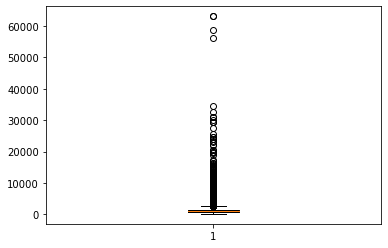

In [39]:
# Sin embargo, tengo valores numericos que puedo rescatar de la columna de "Price" y con un BoxPlot puedo comprobar la
# información que tengo en la función .describe

ropa.describe()
ropa_boxplot = plt.figure()
plt.boxplot(ropa['Price'])
plt.show()

(array([1.1368e+04, 1.7200e+02, 2.9000e+01, 1.4000e+01, 8.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 3.0000e+00]),
 array([  153. ,  6446.7, 12740.4, 19034.1, 25327.8, 31621.5, 37915.2,
        44208.9, 50502.6, 56796.3, 63090. ]),
 <BarContainer object of 10 artists>)

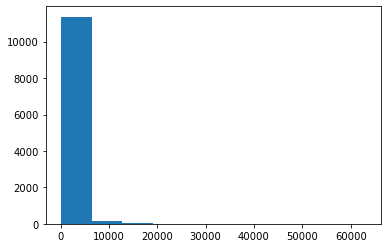

In [40]:
plt.hist(ropa['Price'])

In [52]:
ropa_corr = ropa.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
ropa_corr

,Brand,Gender,Price,Color
Brand,1.000000,0.059440,0.189642,0.012583
Gender,0.059440,1.000000,-0.176731,-0.039450
Price,0.189642,-0.176731,1.000000,0.042126
Color,0.012583,-0.039450,0.042126,1.000000


<AxesSubplot:>

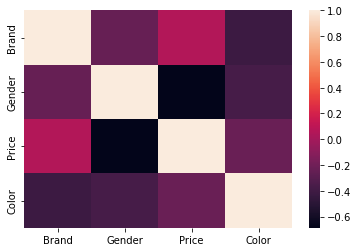

In [53]:
sns.heatmap(ropa_corr.corr())

In [45]:
ropa.to_csv(r'//Users/alanromero/IH/Proyectos/Proyecto_Final/ropa_limpia.csv')